In [196]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [212]:
# load data
data = np.loadtxt("hw2_q2.csv",delimiter=",", dtype=None)

# shuffle data randomly, then train on first 50 sets, test on last 50 sets 
np.random.seed(20)
np.random.shuffle(data)

# set data in numpy matrices
x = np.array(data[:,0])
y = np.array(data[:, 1])

#set test and train data
x_train = np.array(x[:50])
x_test = np.array(x[50:])
y_train = np.array(y[:50])
y_test = np.array(y[50:])

# define constants
n = np.size(x_train)
m = 10


In [213]:
# define functions to perform linear regression with a certain degree and create m-th degree design matrix
MSE = np.zeros(m)

# recursive function for polynomial design matrix; yes, this is not memoized. should do this in future
def designmatrix(x_input,p):
    if (p == 1):
        X = np.vstack([np.ones(np.size(x_input)), x_input]).T
        return X
    else:
        X = np.vstack([designmatrix(x_input, p - 1).T, x_input**p]).T
        return X

# function to perform polynomial regression
def polyreg(x_input, y_input, p):
    X = designmatrix(x_input, p)
    w = np.linalg.lstsq(X,y_input,rcond=None)[0]
    return w, X

In [214]:
# perform polynomial regression on the test data

# initialize arrays for MSE based on various samples
train_MSE = np.zeros(10)
test_MSE = np.zeros(10)

# train models, place MSE values into the desired arrays
for i in range(1,m+1):
    w, X_train = polyreg(x_train, y_train, i)
    X_test = designmatrix(x_test, i)
    train_MSE[i-1] = (1 / n) * sum((y_train - X_train @ w)**2)
    test_MSE[i-1] = (1 / n) * sum((y_test - X_test @ w)**2)

In [215]:
# output training MSE
train_MSE

array([201.18089101, 158.97686017, 143.3328727 , 123.18859358,
       121.26036889, 117.87511816, 117.27009344, 116.36694924,
       116.18434324, 115.57233236])

In [216]:
# output test MSE
test_MSE

array([287.8820108 , 190.63028282, 190.04311513, 135.51445363,
       141.53567582, 147.76355281, 147.91237833, 161.33162202,
       175.14650891, 157.25380689])

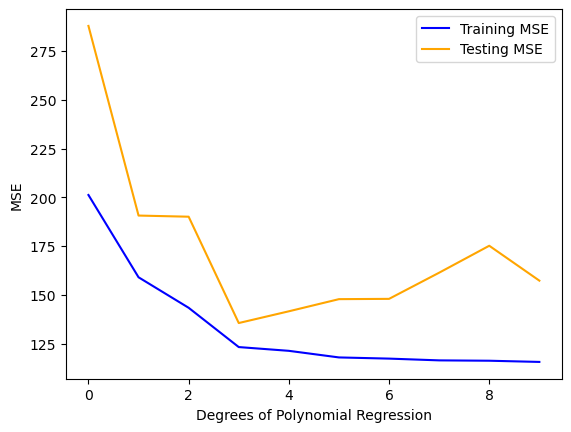

In [217]:
# plot MSE graphs as a function of polynomial degree
plt.plot(list(range(10)), train_MSE, color="Blue", label = "Training MSE")
plt.plot(list(range(10)), test_MSE, color="Orange", label = "Testing MSE")
plt.xlabel("Degrees of Polynomial Regression")
plt.ylabel("MSE")
plt.legend()

training MSE is monotonically decreasing; this makes sense, since increased model flexibility usually decreases training MSE

testing MSE is not monotonically decreasing; this also makes sense, because there is a point at which the increased model flexibility causes overfitting to the training set, which negatively impacts the MSE of the testing set. This point occurs at 3 degrees of freedom.